In [100]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#%matplotlib inline
#import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format


df_alc = pd.read_csv('./russia_alcohol.csv')
df_dem = pd.read_csv('./russian_demography.csv')

ModuleNotFoundError: No module named 'plotly'

## 1. A look at the data

In [92]:
df_dem.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.90,14.20,12.30,84.66,52.42
1,1990,Altai Krai,1.80,12.90,11.10,80.24,58.07
2,1990,Amur Oblast,7.60,16.20,8.60,69.55,68.37
3,1990,Arkhangelsk Oblast,3.70,13.50,9.80,73.26,73.63
4,1990,Astrakhan Oblast,4.70,15.10,10.40,77.05,68.01


In [94]:
df_dem.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,"2,380.00","2,317.00","2,317.00","2,315.00","2,330.00","2,330.00"
mean,"2,003.50",-2.34,11.55,13.90,68.47,69.15
std,8.08,6.06,3.23,3.50,10.45,13.35
min,"1,990.00",-15.90,6.20,3.20,37.50,23.63
25%,"1,996.75",-6.20,9.30,12.10,61.38,62.79
50%,"2,003.50",-3.10,11.00,14.10,68.53,69.58
75%,"2,010.25",0.70,13.00,16.10,76.90,77.62
max,"2,017.00",24.80,29.90,24.90,97.53,100.00


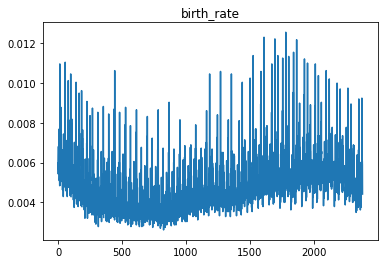

In [99]:
birth_rate_vals = df_dem.birth_rate#Provide a pandas series of the counts for each FormalEducation status

(df_dem.birth_rate/df_dem.shape[0]).plot(kind="line");
plt.title("birth_rate");


####Need to install Plotly
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [96]:
df_alc.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.90,8.80,3.40,0.30,0.10
1,1998,Altai Krai,3.30,19.20,11.30,1.10,0.10
2,1998,Amur Oblast,2.10,21.20,17.30,0.70,0.40
3,1998,Arkhangelsk Oblast,4.30,10.60,11.70,0.40,0.30
4,1998,Astrakhan Oblast,2.90,18.00,9.50,0.80,0.20


In [95]:
df_alc.describe()

,year,wine,beer,vodka,champagne,brandy
count,"1,615.00","1,552.00","1,557.00","1,554.00","1,552.00","1,549.00"
mean,"2,007.00",5.63,51.26,11.82,1.31,0.53
std,5.48,2.81,25.37,5.13,0.80,0.40
min,"1,998.00",0.10,0.40,0.05,0.10,0.00
25%,"2,002.00",3.58,32.40,8.30,0.80,0.20
50%,"2,007.00",5.40,49.97,11.50,1.20,0.40
75%,"2,012.00",7.38,67.40,15.00,1.67,0.70
max,"2,016.00",18.10,207.30,40.60,5.56,2.30


In [97]:
df_dem.year.min() - df_alc.year.mean()

-17.0

In [98]:
df_dem.year.max() - df_alc.year.max()

1

## 2. Prepare dataset

In [73]:
df = pd.merge(df_dem, df_alc, how='inner', on=['year','region'])
df.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,-4.30,9.60,13.90,83.33,53.05,1.90,8.80,3.40,0.30,0.10
1,1998,Altai Krai,-4.00,8.80,12.80,72.67,52.76,3.30,19.20,11.30,1.10,0.10
2,1998,Amur Oblast,-1.80,10.40,12.20,65.59,66.07,2.10,21.20,17.30,0.70,0.40
3,1998,Arkhangelsk Oblast,-4.20,9.10,13.30,68.28,74.30,4.30,10.60,11.70,0.40,0.30
4,1998,Astrakhan Oblast,-3.70,9.60,13.30,73.76,68.13,2.90,18.00,9.50,0.80,0.20


In [88]:
df.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy
count,"1,615.00","1,578.00","1,578.00","1,576.00","1,581.00","1,581.00","1,552.00","1,557.00","1,554.00","1,552.00","1,549.00"
mean,"2,007.00",-2.61,11.78,14.40,64.80,69.23,5.63,51.26,11.82,1.31,0.53
std,5.48,6.15,3.24,3.54,8.77,13.29,2.81,25.37,5.13,0.80,0.40
min,"1,998.00",-15.90,6.20,3.30,37.50,24.58,0.10,0.40,0.05,0.10,0.00
25%,"2,002.00",-6.50,9.60,12.80,59.47,62.90,3.58,32.40,8.30,0.80,0.20
50%,"2,007.00",-3.40,11.20,14.60,64.91,69.60,5.40,49.97,11.50,1.20,0.40
75%,"2,012.00",0.47,13.30,16.40,70.86,77.62,7.38,67.40,15.00,1.67,0.70
max,"2,016.00",24.80,29.90,24.90,89.95,100.00,18.10,207.30,40.60,5.56,2.30
